Final Submission notebook for GS Quantify 2019

The problem is identified as clustering

### Import

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/GS_Quantify_2019/data/train_set.txt',sep='delimiter', header=None)
data_test_public = pd.read_csv('/content/drive/My Drive/GS_Quantify_2019/data/public_test_set.txt',sep='delimiter', header=None)
data_test_private = pd.read_csv('/content/drive/My Drive/GS_Quantify_2019/data/private_test_set.txt',sep='delimiter', header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel 

### TF-IDF approach

Separate all the words, doesnt matter how many words are there, just use all the delimeters and separate

1. Spaces
2. Dots
3. Commas
4. Hyphens (maybe)

Then use all the standard preprocessing techniques

In [4]:
import re 
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#### Preprocessing

In [0]:
def remove(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list

In [0]:
def preprocess(data):
    import re 
    from textblob import Word
    import nltk

    data = data[0].apply(lambda x:[i.split('.')for i in x.strip().split()])

#     data = data.apply(lambda x:[remove(i) for i in x])
    
    data = data.apply(lambda x:' '.join(j for i in x for j in i ))
    data = data.apply(lambda x: " ".join(x.lower() for x in x.split()))
    data =  data.str.replace('[^\w\s]','')

    remove_word = ['gs','lgs','log','info','_','__']

    data = data.apply(lambda x: " ".join(x for x in x.split() if x not in remove_word))

    
    # nltk.download('wordnet')
    data = data.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    data = data.apply(lambda x:x.strip(x.split()[0]))
    
    return data

In [0]:
train = preprocess(data)

In [0]:
test_public = preprocess(data_test_public)

In [0]:
test_private = preprocess(data_test_private)

### Transfer Learning

In [0]:
# imports needed and set up logging
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [14]:
def read_input(data):
    """This method reads the input file which is in gzip format"""
    i=0
    for line in data: 
      i+=1
      if (i%10000==0):
        logging.info ("read {0} logs".format(i))
      # do some pre-processing and return a list of words for each tweet, basically doing tokenizing
      yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list(read_input(train))
logging.info ("Done reading data file")

2019-10-23 16:46:43,820 : INFO : read 10000 logs
2019-10-23 16:46:44,089 : INFO : read 20000 logs
2019-10-23 16:46:44,329 : INFO : read 30000 logs
2019-10-23 16:46:44,571 : INFO : read 40000 logs
2019-10-23 16:46:44,824 : INFO : read 50000 logs
2019-10-23 16:46:45,096 : INFO : read 60000 logs
2019-10-23 16:46:45,350 : INFO : read 70000 logs
2019-10-23 16:46:45,603 : INFO : read 80000 logs
2019-10-23 16:46:45,846 : INFO : Done reading data file


In [16]:
import nltk
nltk.download('punkt')
documents = []
i=0
for line in train: 
    i+=1
    if (i%10000==0):
      logging.info ("read {0} logs".format(i))
      # do some pre-processing and return a list of words for each tweet, basically doing tokenizing
    # documents.append(gensim.utils.simple_preprocess(line))
    documents.append(nltk.word_tokenize(line))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


2019-10-23 16:47:27,118 : INFO : read 10000 logs
2019-10-23 16:47:28,965 : INFO : read 20000 logs
2019-10-23 16:47:30,949 : INFO : read 30000 logs
2019-10-23 16:47:32,809 : INFO : read 40000 logs
2019-10-23 16:47:34,681 : INFO : read 50000 logs
2019-10-23 16:47:36,562 : INFO : read 60000 logs
2019-10-23 16:47:38,454 : INFO : read 70000 logs
2019-10-23 16:47:40,394 : INFO : read 80000 logs


In [17]:
from gensim.models import Word2Vec
sentences = documents
# size option needs to be set to 300 to be the same as Google's pre-trained model
 
word2vec_model = Word2Vec(size = 300, window=5,
min_count = 1, workers = 10)

word2vec_model.build_vocab(sentences)
 
# assign the vectors to the vocabs that are in Google's pre-trained model and your sentences defined above.


2019-10-23 16:47:47,797 : INFO : collecting all words and their counts
2019-10-23 16:47:47,799 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-10-23 16:47:47,842 : INFO : PROGRESS: at sentence #10000, processed 155869 words, keeping 14324 word types
2019-10-23 16:47:47,885 : INFO : PROGRESS: at sentence #20000, processed 312010 words, keeping 23206 word types
2019-10-23 16:47:47,926 : INFO : PROGRESS: at sentence #30000, processed 468095 words, keeping 31063 word types
2019-10-23 16:47:47,971 : INFO : PROGRESS: at sentence #40000, processed 627681 words, keeping 37289 word types
2019-10-23 16:47:48,017 : INFO : PROGRESS: at sentence #50000, processed 791306 words, keeping 40719 word types
2019-10-23 16:47:48,067 : INFO : PROGRESS: at sentence #60000, processed 954539 words, keeping 43117 word types
2019-10-23 16:47:48,113 : INFO : PROGRESS: at sentence #70000, processed 1118127 words, keeping 44895 word types
2019-10-23 16:47:48,155 : INFO : PROGRESS: at

In [18]:
# lockf needs to be set to 1.0 to allow continued training.
word2vec_model.intersect_word2vec_format('/content/drive/My Drive/Hate_Speech_Detection_git/GoogleNews-vectors-negative300.bin.gz', lockf=1.0, binary=True)

2019-10-23 16:47:56,000 : INFO : loading projection weights from /content/drive/My Drive/Hate_Speech_Detection_git/GoogleNews-vectors-negative300.bin.gz
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-10-23 16:49:45,331 : INFO : merged 88 vectors into (47219, 300) matrix from /content/drive/My Drive/Hate_Speech_Detection_git/GoogleNews-vectors-negative300.bin.gz


In [19]:
# continue training with you own data
word2vec_model.train(sentences, total_examples=len(sentences), epochs = 10)

2019-10-23 16:50:41,690 : INFO : training model with 10 workers on 47219 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2019-10-23 16:50:42,732 : INFO : EPOCH 1 - PROGRESS: at 40.87% examples, 297205 words/s, in_qsize 19, out_qsize 0
2019-10-23 16:50:43,817 : INFO : EPOCH 1 - PROGRESS: at 80.61% examples, 318330 words/s, in_qsize 19, out_qsize 0
2019-10-23 16:50:44,126 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-10-23 16:50:44,133 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-10-23 16:50:44,135 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-10-23 16:50:44,160 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-10-23 16:50:44,162 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-10-23 16:50:44,190 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-10-23 16:50:44,221 : INFO : worker thread finished; awaiting finish of

(8503257, 14065190)

In [20]:
word2vec_model.wv.save_word2vec_format('model_transfer_learning_w2v.txt', binary=False)
# save this model and then use it further

2019-10-23 16:51:37,680 : INFO : storing 47219x300 projection weights into model_transfer_learning_w2v.txt
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### Word2Vec

After experimenting a lot with TF-IDF approach, we will try the word2vec pretrained embedsdings

In [0]:
import gensim
import logging

These embeddings need to be downloaded in your local machine, and then can be loaded to transform your document into numeric data

In [22]:
from gensim.models import Word2Vec
# using pretrained model
# wv = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/Hate_Speech_Detection_git/GoogleNews-vectors-negative300.bin.gz", binary=True)
# you might need to download these embeddings, and change the path above. As I have already placed it in my drive

# using transfer learing model
wv = gensim.models.KeyedVectors.load_word2vec_format("model_transfer_learning_w2v.txt", binary=False)

# uncomment the model which u wish to use
wv.init_sims(replace=True)

2019-10-23 16:51:52,331 : INFO : loading projection weights from model_transfer_learning_w2v.txt
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-10-23 16:52:07,032 : INFO : loaded (47219, 300) matrix from model_transfer_learning_w2v.txt
2019-10-23 16:52:07,033 : INFO : precomputing L2-norms of word weight vectors


We use the averaging method here, basically converting all the words in a sentence into a vector and then taking mean of all the vectors in a sentence, which will represent that sentence in a N-Dimensional numeric vector.

We use Google-News pretrained word embeddings for training, it can be downloaded from [here](https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz)

In [0]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [24]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens


import nltk
nltk.download('punkt')

train_w2v, test_w2v, test_private_w2v = train, test_public, test_private

test_tokenized_private = test_private_w2v.apply(lambda r: w2v_tokenize_text(r)).values

test_tokenized = test_w2v.apply(lambda r: w2v_tokenize_text(r)).values

train_tokenized = train_w2v.apply(lambda r: w2v_tokenize_text(r)).values



X_train_word_average = word_averaging_list(wv,train_tokenized)

X_test_word_average = word_averaging_list(wv,test_tokenized)

X_test_private_word_average = word_averaging_list(wv,test_tokenized_private)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### Model after FE

We do a little bit of Feature engineering here, we concat the PCA components of data to current feature matrix. This gave a significant increament on leaderboard

In [0]:
x_t = X_train_word_average
x_v = X_test_word_average
x_v_private = X_test_private_word_average
## these were the feature matrices we used before PCA Fature engineering


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

pca_x = np.concatenate([x_t,pca.fit_transform(X_train_word_average)],axis=1)
pca_x_v = np.concatenate([x_v,pca.transform(X_test_word_average)],axis=1)
pca_x_v_private =  np.concatenate([x_v_private,pca.transform(X_test_private_word_average)],axis=1)
# X = pca.fit_transform(x_t_df)

### Final Model

#### K-Means Clustering

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=20,max_iter=150)
# km.fit(x_t)
km.fit(pca_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# km.predict(x_t)
km.predict(pca_x)
labels = km.labels_

In [34]:
km.inertia_
# 8180.185262008089 daymnnn, the word2vec domain+pretrained is giving almost half inertia wrt to single pretrained embeddings model

4929.1512383829795

##### Lets save this model, for reproducibility of our results

In [0]:
# import pickle
# filename = 'best_model_9_40pm_latest_954.sav'
# pickle.dump(km, open(filename, 'wb'))

### Lets visualize this

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X = pca.fit_transform(x_t)
# X = pca.fit_transform(x_t_df)

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Text(0.5, 0.92, 'K Means')

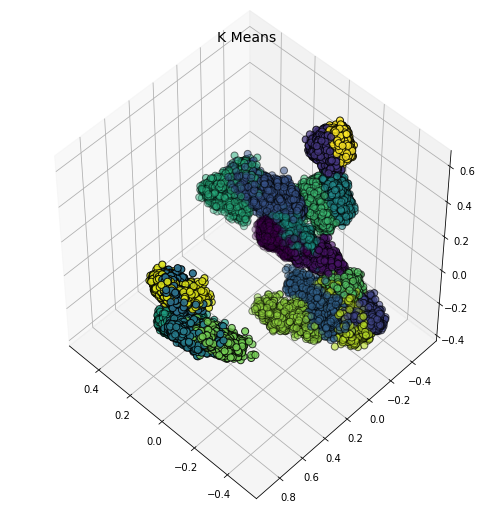

In [33]:
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter3D(X[:, 2], X[:, 0], X[:, 1],
          c=labels.astype(np.float), edgecolor="k", s=50)
plt.title("K Means", fontsize=14)

#### We do see some clusters, lets predict on test data
And these clusters are way better than what we got on pretrained embeddings model. So yes our hypothesis is true!

1.   List item
2.   List item



### Submission

In [0]:
# import pickle
# loaded_model = pickle.load(open('best_model_asofnow.sav', 'rb'))
# subs = pd.Series(loaded_model.predict(x_v))

In [0]:
# subs = pd.Series(km.predict(x_v))
subs = pd.Series(km.predict(pca_x_v))
subs = subs.apply(lambda x:'C'+str(x+1))
line_no = pd.Series(range(0,len(test_public))).apply(lambda x:'L'+str(x))
submission = pd.DataFrame(line_no,columns=['LineNumber'])
submission['Class'] = subs

In [0]:
submission['Class'] = subs

In [0]:
submission.to_csv('submission_3_clusters#20_word2vec_pca_add.csv',index=False, header=True)

### Private Set

In [0]:
# subs_private = pd.Series(loaded_model.predict(x_v_private))

subs_private = pd.Series(km.predict(pca_x_v_private))

subs_private = subs_private.apply(lambda x:'C'+str(x+1))
line_no = pd.Series(range(0,len(test_private))).apply(lambda x:'L'+str(x))
submission_private = pd.DataFrame(line_no,columns=['LineNumber'])
submission_private['Class'] = subs_private

In [0]:
submission_private.to_csv('submission_3_clusters_word2vec_pca_add_PRIVATE.csv',index=False, header=True)

#### PRIVATE submission done!

### Elbow Method - Execute these cells for param tuning

#### Current optimal params - 
1. k = 20
2. max_iter = 150

In [0]:
# from sklearn import metrics 
# from scipy.spatial.distance import cdist 

In [0]:
# x=x_t.todense()

In [0]:
# distortions = [] 
# inertias = [] 
# mapping1 = {} 
# mapping2 = {} 
# K = range(5,20) 
  
# x = x_t.todense()

# count=0
# for k in K: 
#     #Building and fitting the model 
#     kmeanModel = KMeans(n_clusters=k).fit(x) 
#     kmeanModel.fit(x)     
      
#     distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
#                       'euclidean'),axis=1)) / x.shape[0]) 
#     inertias.append(kmeanModel.inertia_) 
  
#     mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
#                  'euclidean'),axis=1)) / x.shape[0] 
#     mapping2[k] = kmeanModel.inertia_ 
    
#     count+=1
#     print(count,'Models trained ..')

In [0]:
# for key,val in mapping1.items(): 
#     print(str(key)+' : '+str(val)) 

# plt.plot(iters, distortions, 'bx-') 
# plt.xlabel('Values of K') 
# plt.ylabel('Distortion') 
# plt.title('The Elbow Method using Distortion') 
# plt.show() 

In [0]:
# for key,val in mapping2.items(): 
#     print(str(key)+' : '+str(val))
    
# plt.plot(iters, inertias, 'bx-') 
# plt.xlabel('Values of K') 
# plt.ylabel('Inertia') 
# plt.title('The Elbow Method using Inertia') 
# plt.show() 